In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from difflib import get_close_matches
from difflib import SequenceMatcher

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

plt.style.use('seaborn')

In [35]:
genres_item_matrix = pd.read_csv('data/genres_item_matrix.csv', index_col='id')
tag_item_matrix = pd.read_csv('data/tag_item_matrix.csv', index_col='id')
title_df = pd.read_csv('data/title_df.csv', index_col='id')

In [36]:
# We'll use this dataframe later for lookup
title_df.head()

,romaji,english,native,userPreferred
id,,,,
10161,No.6,No.6,NO.6 ナンバー・シックス,No.6
99726,Net-juu no Susume,Recovery of an MMO Junkie,ネト充のススメ,Net-juu no Susume
98526,Robomasters The Animated Series,NaN,ROBOMASTERS THE ANIMATED SERIES,Robomasters The Animated Series
966,Crayon Shin-chan,Shin Chan,クレヨンしんちゃん,Crayon Shin-chan
4876,Hashire Melos!,Run Melos!,走れメロス,Hashire Melos!


In [4]:
genres_item_matrix.head()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,mystery,psychological,romance,sci_fi,slice_of_life,sports,supernatural,thriller
id,,,,,,,,,,,,,,,,,,
10161,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99726,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
98526,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4876,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
tag_item_matrix.head()

,4_koma,achronological_order,acting,advertisement,afterlife,age_gap,age_regression,agender,airsoft,aliens,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
id,,,,,,,,,,,,,,,,,,,,,
10161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = pd.concat([genres_item_matrix, tag_item_matrix], axis=1)
df.head()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
id,,,,,,,,,,,,,,,,,,,,,
10161,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99726,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98526,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4876,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.tail()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
id,,,,,,,,,,,,,,,,,,,,,
99586,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
101283,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101633,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9832 entries, 10161 to 101089
Columns: 265 entries, action to zombie
dtypes: int64(265)
memory usage: 20.0 MB


In [9]:
df.describe()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
count,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,...,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000
mean,0.268002,0.213283,0.391172,0.190704,0.062449,0.198841,0.034886,0.025325,0.082994,0.097539,...,0.006001,0.018206,0.002034,0.001526,0.000305,0.003458,0.004577,0.011086,0.025427,0.005391
std,0.442941,0.409647,0.488038,0.392876,0.241982,0.399148,0.183501,0.157120,0.275888,0.297048,...,0.077236,0.133702,0.045058,0.039032,0.017466,0.058707,0.067501,0.104711,0.157427,0.073226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
total_per_feature = df.sum(axis=0)
total_per_feature

action       2635
adventure    2097
comedy       3846
drama        1875
ecchi         614
             ... 
yakuza         34
yandere        45
youkai        109
yuri          250
zombie         53
Length: 265, dtype: int64

In [11]:
total_per_show = df.sum(axis=1)
total_per_show

id
10161      9
99726     13
98526      5
966        9
4876      11
          ..
99586     11
99916      7
101283    18
101633    12
101089     3
Length: 9832, dtype: int64

In [12]:
total_per_show.rename('total_features_per_show')

id
10161      9
99726     13
98526      5
966        9
4876      11
          ..
99586     11
99916      7
101283    18
101633    12
101089     3
Name: total_features_per_show, Length: 9832, dtype: int64

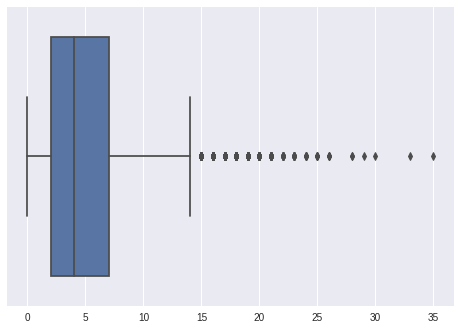

In [13]:
sns.boxplot(total_per_show);

This seems potentially problematic. A majority of the shows don't have very many features. How many are needed to make an acurate recommendation?

In [14]:
def count_for_n_features(series, n):
    print('{0:.1%}'.format(len(series[series <= n]) / len(series)), 
          'or', len(series[series <= n]), f'shows have {n} or fewer features describing them.')


In [15]:
count_for_n_features(total_per_show, 2)

28.5% or 2805 shows have 2 or fewer features describing them.


In [16]:
count_for_n_features(total_per_show, 3)

41.0% or 4034 shows have 3 or fewer features describing them.


In [17]:
count_for_n_features(total_per_show, 4)

51.3% or 5047 shows have 4 or fewer features describing them.


While selecting which tags to keep, many were cut out because of a low "rank" score. Let's go back and keep all tags but normalize(standardize?) them. 

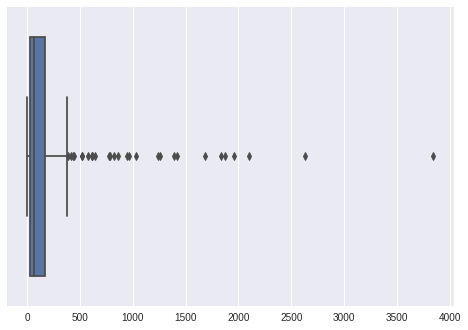

In [18]:
sns.boxplot(total_per_feature);

In [19]:
# the tags below each describe 5 or fewer anime. They can be dropped without losing too much.
total_per_feature[total_per_feature < 6]

airsoft         5
asexual         4
badminton       2
bondage         5
calligraphy     4
centaur         5
cheerleading    5
ero_guro        4
feet            1
full_color      1
go              4
lacrosse        4
masturbation    1
netorare        4
pov             1
prostitution    1
reformation     1
rugby           3
surfing         3
table_tennis    4
teens_love      3
urination       1
vikings         2
voyeur          1
wuxia           3
dtype: int64

## Getting Recommendations

In [45]:
cos_sim = cosine_similarity(df.values)

ham_sim = hamming_similarity(df.values)

In [66]:
# def hamming_similarity(df):
#     return (1 - pairwise_distances(df.T, metric="hamming"))

def get_recommended_titles(recommendations_df):
    recom_titles = []
    for idx, row in recommendations_df.iterrows():
        if type(row['english']) != float:
            recom_titles.append(row['english'])
        else:
            recom_titles.append(row['userPreferred'])
    
    return recom_titles


def get_top_n_recommendations(search_term, content_item_matrix, n=5):
    search_result = get_close_matches(search_term, 
                                      title_df['userPreferred'], 
                                      cutoff=0.25, 
                                      n=1)
    print('Closest match: ', search_result)
    
    search_result_idx = title_df[title_df['userPreferred'].isin(search_result)].index
    df.iloc[search_result_idx, :]

    # get position of anime (id in index)
    positional_idx = df.index.get_loc(int(search_result_idx.values))
    
    # get top n indicies. The top match will always be the initial item.
    top_n = np.argsort(content_item_matrix[positional_idx,:])[-n-1:-1]
    recom_titles = get_recommended_titles(title_df.iloc[top_n,:])
    
    return recom_titles


def view_title_similarity(search_term, recom_titles):
    for title in recom_titles:
        seq_matcher = SequenceMatcher(None, search_term, title)
        print(f'The terms "{search_term}" and "{title}" are ' 
              + '{0:.2%}'.format(seq_matcher.quick_ratio()) + ' alike.')

<b>Recommendations should probably exclude titles from the same franchise.  
For example, try getting recommendations for Ghost in the Shell.  
If you already know you like Ghost in the Shell, it's pretty easy to find others in the same franchise if that's what you want.  </b>

First of all, our rudimentary search engine is failing...

In [67]:
search_term='Ghost in the Shell'
rec_list = get_top_n_recommendations(search_term, cos_sim, n=10)
rec_list

Closest match:  ['Ghost Hunt']


['Gregory Horror Show: The Bloody Karte',
 'Dusk Maiden of Amnesia: Exorcism Maiden',
 'Spooky Kitaro',
 'Gregory Horror Show: The Last Train',
 'Gregory Horror Show',
 'Gegege no Kitarou (1968)',
 'Purple Eyes in the Dark',
 'Gui Shui Yi Yun',
 'Zekkyou Gakkyuu: Tensei',
 "Nanana's Buried Treasure"]

In [68]:
view_title_similarity(search_term, rec_list)

The terms "Ghost in the Shell" and "Gregory Horror Show: The Bloody Karte" are 43.64% alike.
The terms "Ghost in the Shell" and "Dusk Maiden of Amnesia: Exorcism Maiden" are 31.58% alike.
The terms "Ghost in the Shell" and "Spooky Kitaro" are 32.26% alike.
The terms "Ghost in the Shell" and "Gregory Horror Show: The Last Train" are 52.83% alike.
The terms "Ghost in the Shell" and "Gregory Horror Show" are 37.84% alike.
The terms "Ghost in the Shell" and "Gegege no Kitarou (1968)" are 47.62% alike.
The terms "Ghost in the Shell" and "Purple Eyes in the Dark" are 53.66% alike.
The terms "Ghost in the Shell" and "Gui Shui Yi Yun" are 48.48% alike.
The terms "Ghost in the Shell" and "Zekkyou Gakkyuu: Tensei" are 43.90% alike.
The terms "Ghost in the Shell" and "Nanana's Buried Treasure" are 33.33% alike.


In [69]:
search_term= "Wolf's Rain"
n = 5
rec_list = get_top_n_recommendations(search_term, cos_sim, n=n)
print('-----')
print(f'Top {n} based on {search_term}: \n{rec_list}')

Closest match:  ["Wolf's Rain"]
-----
Top 5 based on Wolf's Rain: 
['Pokémon: Lucario and the Mystery of Mew', 'Final Fantasy VII: Last Order', 'Texhnolyze', 'Wan Wan Chuushingura', "Wolf's Rain OVA"]


In [70]:
view_title_similarity(search_term, rec_list)

The terms "Wolf's Rain" and "Pokémon: Lucario and the Mystery of Mew" are 28.00% alike.
The terms "Wolf's Rain" and "Final Fantasy VII: Last Order" are 30.00% alike.
The terms "Wolf's Rain" and "Texhnolyze" are 28.57% alike.
The terms "Wolf's Rain" and "Wan Wan Chuushingura" are 38.71% alike.
The terms "Wolf's Rain" and "Wolf's Rain OVA" are 84.62% alike.


Why is a Pokemon movie showing up as a recommendation based on Wolf's Rain?

<tr>
    <td> <img src="https://upload.wikimedia.org/wikipedia/en/thumb/4/43/Wolf%27s_Rain_Region_2_Volume_1.jpg/220px-Wolf%27s_Rain_Region_2_Volume_1.jpg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/95/Pok%C3%A9mon_Lucario_film_poster.jpg/220px-Pok%C3%A9mon_Lucario_film_poster.jpg" alt="Drawing" style="width: 250px;"/> </td>
    </tr>

In [104]:
wr_id = title_df[title_df['english'] == "Wolf's Rain"].index
wr_df = df.loc[wr_id,:]

In [107]:
# Genres and tags for Wolf's Rain
wr_df.loc[:, (wr_df != 0).any(axis=0)]

,action,adventure,drama,fantasy,mystery,sci_fi,animals,dystopian,post_apocalyptic,primarily_adult_cast,survival,tragedy,werewolf
id,,,,,,,,,,,,,
202,1,1,1,1,1,1,1,1,1,1,1,1,1


In [105]:
pk_id = title_df[title_df['english'] == "Pokémon: Lucario and the Mystery of Mew"].index
pk_df = df.loc[pk_id,:]

In [106]:
# Genres and tags for Pokémon: Lucario and the Mystery of Mew
pk_df.loc[:, (pk_df != 0).any(axis=0)]

,action,adventure,drama,fantasy,animals,kids
id,,,,,,
1526,1,1,1,1,1,1


Would it be wise to give a heavier weight to the "kids" column?

In [130]:
sum(df['kids'])

782

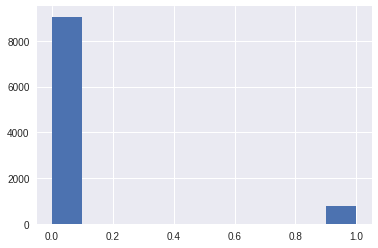

In [111]:
plt.hist(df['kids']);

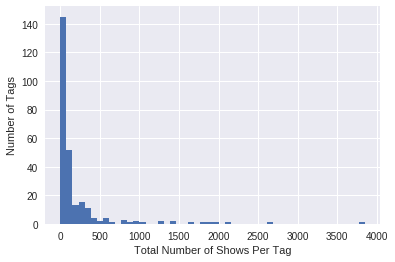

In [132]:
plt.hist(total_per_feature, bins=50)
plt.ylabel('Number of Tags')
plt.xlabel('Total Number of Shows Per Tag');

In [129]:
for tag, count in total_per_feature.sort_values(ascending=False).iteritems():
    print(tag, count)

comedy 3846
action 2635
adventure 2097
fantasy 1955
drama 1875
sci_fi 1830
shounen 1681
romance 1413
school 1390
slice_of_life 1252
male_protagonist 1235
female_protagonist 1031
music 959
supernatural 946
magic 857
mecha 816
kids 782
primarily_female_cast 773
super_power 640
ecchi 614
seinen 612
historical 610
shoujo 576
sports 521
mystery 518
military 438
parody 434
tragedy 411
primarily_adult_cast 386
space 377
demons 370
harem 364
horror 343
primarily_male_cast 340
nudity 338
animals 336
aliens 319
psychological 318
cute_girls_doing_cute_things 313
episodic 310
swordplay 297
henshin 287
ensemble_cast 287
cgi 279
urban_fantasy 270
coming_of_age 269
love_triangle 252
yuri 250
war 249
mahou_shoujo 249
idol 245
robots 244
isekai 243
foreign 240
gore 238
police 207
school_club 203
primarily_child_cast 191
time_manipulation 191
full_cgi 186
guns 181
work 179
post_apocalyptic 172
gods 168
super_robot 167
meta 167
surreal_comedy 166
real_robot 159
martial_arts 152
chibi 148
revenge 147
tsun

<b>Would like to penalize features that describe a large number of shows (i.e. comedy) and give a heavier weight to those that describe fewer shows.  
The normalization should be strong enough to not recommend a Pokemon movie when looking at "Wolf's Rain" but not so strong that all recommendations are based on the rarest tag. </b>

In [63]:
get_close_matches('No.6', title_df['english'])

TypeError: object of type 'float' has no len()

In [104]:
# PCA